In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('AQI_data.csv')
df.head()

,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),CO,Ozone,PM10,PM25,NO2
0,01/01/2020,85,PM2.5,"TRAFFIC, RURAL PAVED ROAD",06-007-4001,AQS,6.0,28,25,85,19
1,01/02/2020,66,PM2.5,Chico-East Avenue,06-007-0008,AQS,7.0,33,20,66,17
2,01/03/2020,77,PM2.5,Chico-East Avenue,06-007-0008,AQS,8.0,31,28,77,20
3,01/04/2020,67,PM2.5,"TRAFFIC, RURAL PAVED ROAD",06-007-4001,AQS,6.0,30,16,67,16
4,01/05/2020,64,PM2.5,Chico-East Avenue,06-007-0008,AQS,6.0,32,17,64,17


In [63]:
df.drop(columns=['Date','Main Pollutant','Site Name (of Overall AQI)','Site ID (of Overall AQI)','Source (of Overall AQI)'],inplace=True,axis=1)

In [64]:
df.head()

,Overall AQI Value,CO,Ozone,PM10,PM25,NO2
0,85,6.0,28,25,85,19
1,66,7.0,33,20,66,17
2,77,8.0,31,28,77,20
3,67,6.0,30,16,67,16
4,64,6.0,32,17,64,17


In [65]:
df.isnull().sum()

Overall AQI Value      0
CO                   185
Ozone                  5
PM10                 129
PM25                   0
NO2                  190
dtype: int64

In [66]:
type(df['Ozone'])

pandas.core.series.Series

In [67]:
df['CO'] = df['CO'].fillna(df['CO'].mean())

In [68]:
# Convert the 'PM10' column to numeric, handling errors
df['PM10'] = pd.to_numeric(df['PM10'], errors='coerce')
# Now fill NaN values with the mean
df['PM10'] = df['PM10'].fillna(df['PM10'].mean())

In [69]:
type(df['CO'])

pandas.core.series.Series

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Overall AQI Value  1839 non-null   int64  
 1   CO                 1839 non-null   float64
 2   Ozone              1834 non-null   object 
 3   PM10               1839 non-null   float64
 4   PM25               1839 non-null   int64  
 5   NO2                1649 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 86.3+ KB


In [71]:
df['NO2'] = pd.to_numeric(df['NO2'], errors='coerce')
# Now fill NaN values with the mean
df['NO2'] = df['NO2'].fillna(df['NO2'].mean())

In [72]:
df['Ozone'] = pd.to_numeric(df['Ozone'], errors='coerce')
# Now fill NaN values with the mean
df['Ozone'] = df['Ozone'].fillna(df['Ozone'].mean())

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Overall AQI Value  1839 non-null   int64  
 1   CO                 1839 non-null   float64
 2   Ozone              1839 non-null   float64
 3   PM10               1839 non-null   float64
 4   PM25               1839 non-null   int64  
 5   NO2                1839 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 86.3 KB


In [74]:
df.head()

,Overall AQI Value,CO,Ozone,PM10,PM25,NO2
0,85,6.0,28.0,25.0,85,19.0
1,66,7.0,33.0,20.0,66,17.0
2,77,8.0,31.0,28.0,77,20.0
3,67,6.0,30.0,16.0,67,16.0
4,64,6.0,32.0,17.0,64,17.0


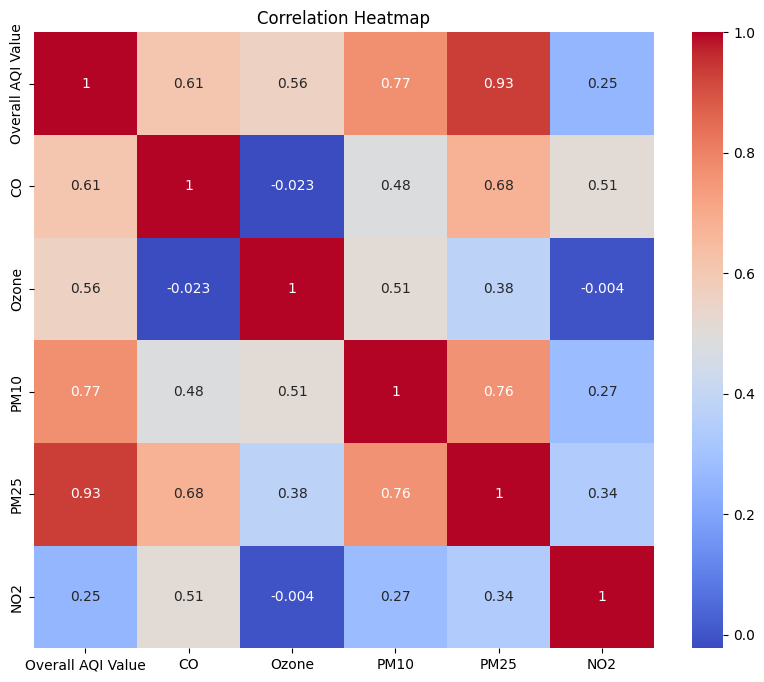

In [75]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [76]:
X = df.drop('Overall AQI Value',axis=1)
y = df['Overall AQI Value']

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

In [78]:
X_train

,CO,Ozone,PM10,PM25,NO2
582,1.0,44.0,27.000000,41,5.0
1511,2.0,35.0,4.000000,22,8.0
124,2.0,51.0,21.533645,41,8.0
797,3.0,43.0,11.000000,19,10.0
1293,2.0,58.0,62.000000,57,17.0
...,...,...,...,...,...
356,5.0,37.0,17.000000,61,9.0
960,3.0,84.0,36.000000,56,16.0
812,3.0,50.0,14.000000,28,8.0
132,2.0,36.0,6.000000,12,4.0


In [79]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [80]:
y_pred = model.predict(X_test)

In [81]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Model Evaluation:
Mean Squared Error: 70.23391818005707
R2 Score: 0.9386861207254152


In [82]:
with open('model_coefficients.txt', 'w') as f:
    f.write(f"Intercept: {model.intercept_}\n")
    for i, col in enumerate(X.columns):
        f.write(f"{col}: {model.coef_[i]}\n")

print("Model coefficients saved to 'model_coefficients.txt'")

Model coefficients saved to 'model_coefficients.txt'
